In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
x = tf.placeholder(tf.float32 , shape=[None , 784])
y = tf.placeholder(tf.float32 , shape=[None , 10])

In [7]:
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [8]:
c = tf.matmul(x, w) + b

In [9]:
cross_entr = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y , logits=c))

In [10]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = opt.minimize(cross_entr)

In [11]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    for steps in range(100):
        batchX , batchY = mnist.train.next_batch(batch_size=100)
        sess.run(train , feed_dict={x:batchX , y:batchY})
    
    corr = tf.equal(tf.argmax(y, 1), tf.argmax(c, 1))
    accuracy = tf.reduce_mean(tf.cast(corr , tf.float32))
    print(sess.run(accuracy ,feed_dict={x:mnist.test.images , y:mnist.test.labels}))

0.8937


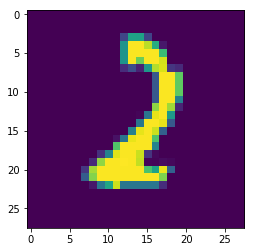

In [15]:
plt.imshow(mnist.train.images[54].reshape((28 , 28)))